### This is a simple notebook to build and visualize decision trees, based on material from a course at CCA led by Prof. Vivian Acquaviva from Hunter Colege. 
It accompanies Chapter 2 of her book (in prep.)

Author: Viviana Acquaviva
    
Some visualization-inspiration credits:

https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176


In [1]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd 

from sklearn.model_selection import train_test_split #we don't use it here, but it's a useful function!

from sklearn.tree import DecisionTreeClassifier #how methods are imported 

from sklearn import metrics #this will give us access to evaluation metrics

In [2]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

In [3]:
#Here is a bunch of packages for visualization purposes only - this cell can be skipped if troublesome

from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

### We use a selection of data from http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

### We begin by reading in the data set using pandas.

In [4]:
LearningSet = pd.read_csv('HPLearningSet.csv')

LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

The structure we created is called a data frame.

It's nice because we can refer to columns with their names as well as indices, and it looks neat. 

In [5]:
LearningSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


### Let's pick the same train/test set we had in the exercise.

In [6]:
TrainSet =  LearningSet.iloc[:13,:]  #normally this would happen at random, using the function train_test_split

TestSet = LearningSet.iloc[13:,:]

### We split the train and test sets in features and labels.

In [7]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)

In [8]:
ytrain = TrainSet.P_HABITABLE

ytest = TestSet.P_HABITABLE

### And we are ready to fit the model with our decision tree!

Note: The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. 

To obtain a deterministic behaviour during fitting, random_state has to be fixed.


In [9]:
model = DecisionTreeClassifier(random_state = 3) #This is how we specify which method we'd like to use, and any parameters.

model.fit(Xtrain, ytrain) #This tiny line is how we build models in sklearn.

DecisionTreeClassifier(random_state=3)

### Finally, we can visualize the tree.

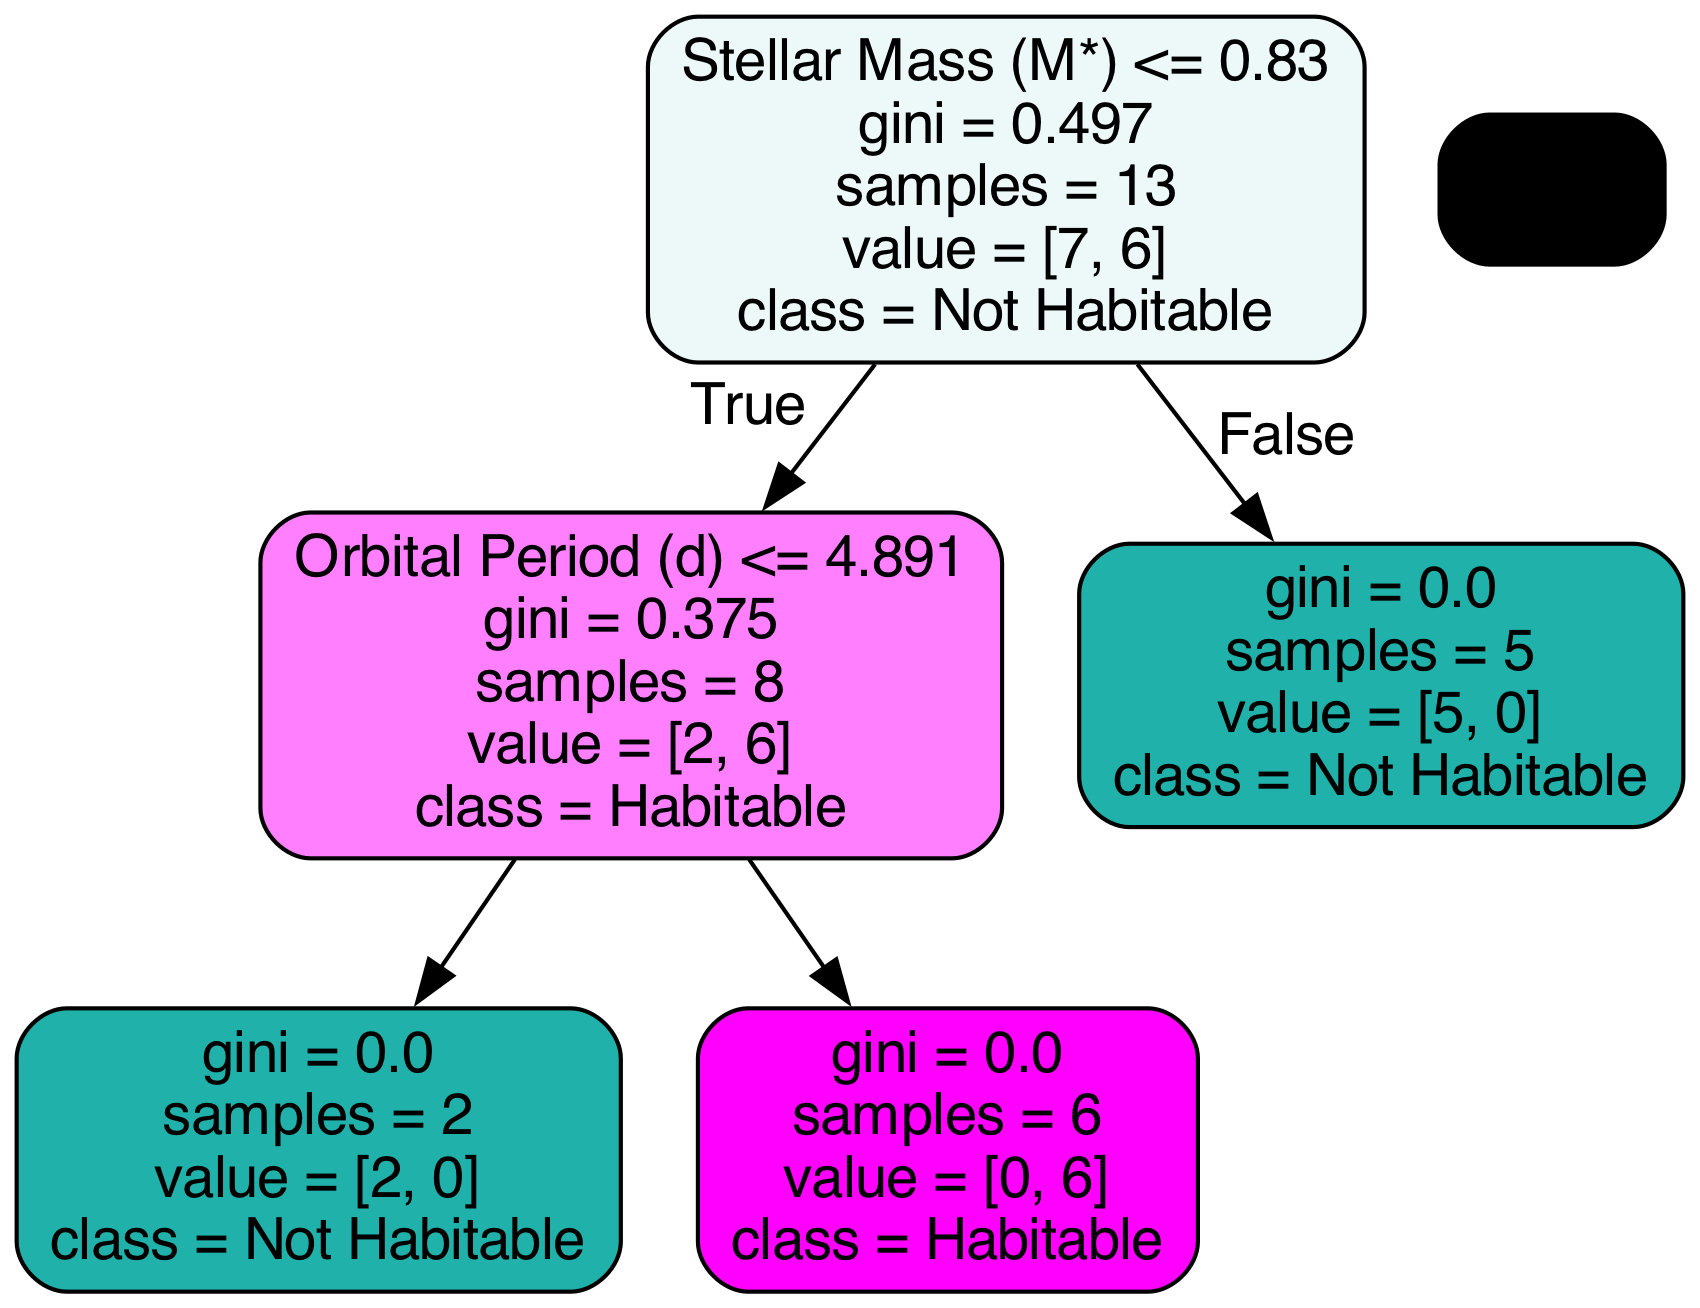

In [10]:
dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'],
            class_names = ['Not Habitable','Habitable'],
            filled = True,
            rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [255 * v / sum(values) for v in values]
        
        values = [int(255 * v / sum(values)) for v in values]
            
        if values[0] > values[1]:
            alpha = int(values[0] - values[1])
            alpha = '{:02x}'.format(alpha) #turn into hexadecimal
            color = '#20 B2 AA'+str(alpha)
        else:
            alpha = int(values[1] - values[0])
            alpha = '{:02x}'.format(alpha)
            color = '#FF 00 FF'+str(alpha)
        node.set_fillcolor(color)

graph.set_dpi('300')

Image(graph.create_png())

#Image(graph.write_png('Graph.png'))

### This is an alternative visualization, which only relies on the sklearn package.

In [ ]:
from sklearn import tree

plt.figure(figsize=(40,20))  # customize according to the size of your tree

tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])

plt.show()

### We can visualize the splits as well and then answer some questions.

/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/868553593.py:39: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[2].set_color('k')
/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/868553593.py:40: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[3].set_color('k')
/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/868553593.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  plt.legend(handles=[leg.legendHandles[2],leg.legendHandles[3], magentapatch, bluepatch],\


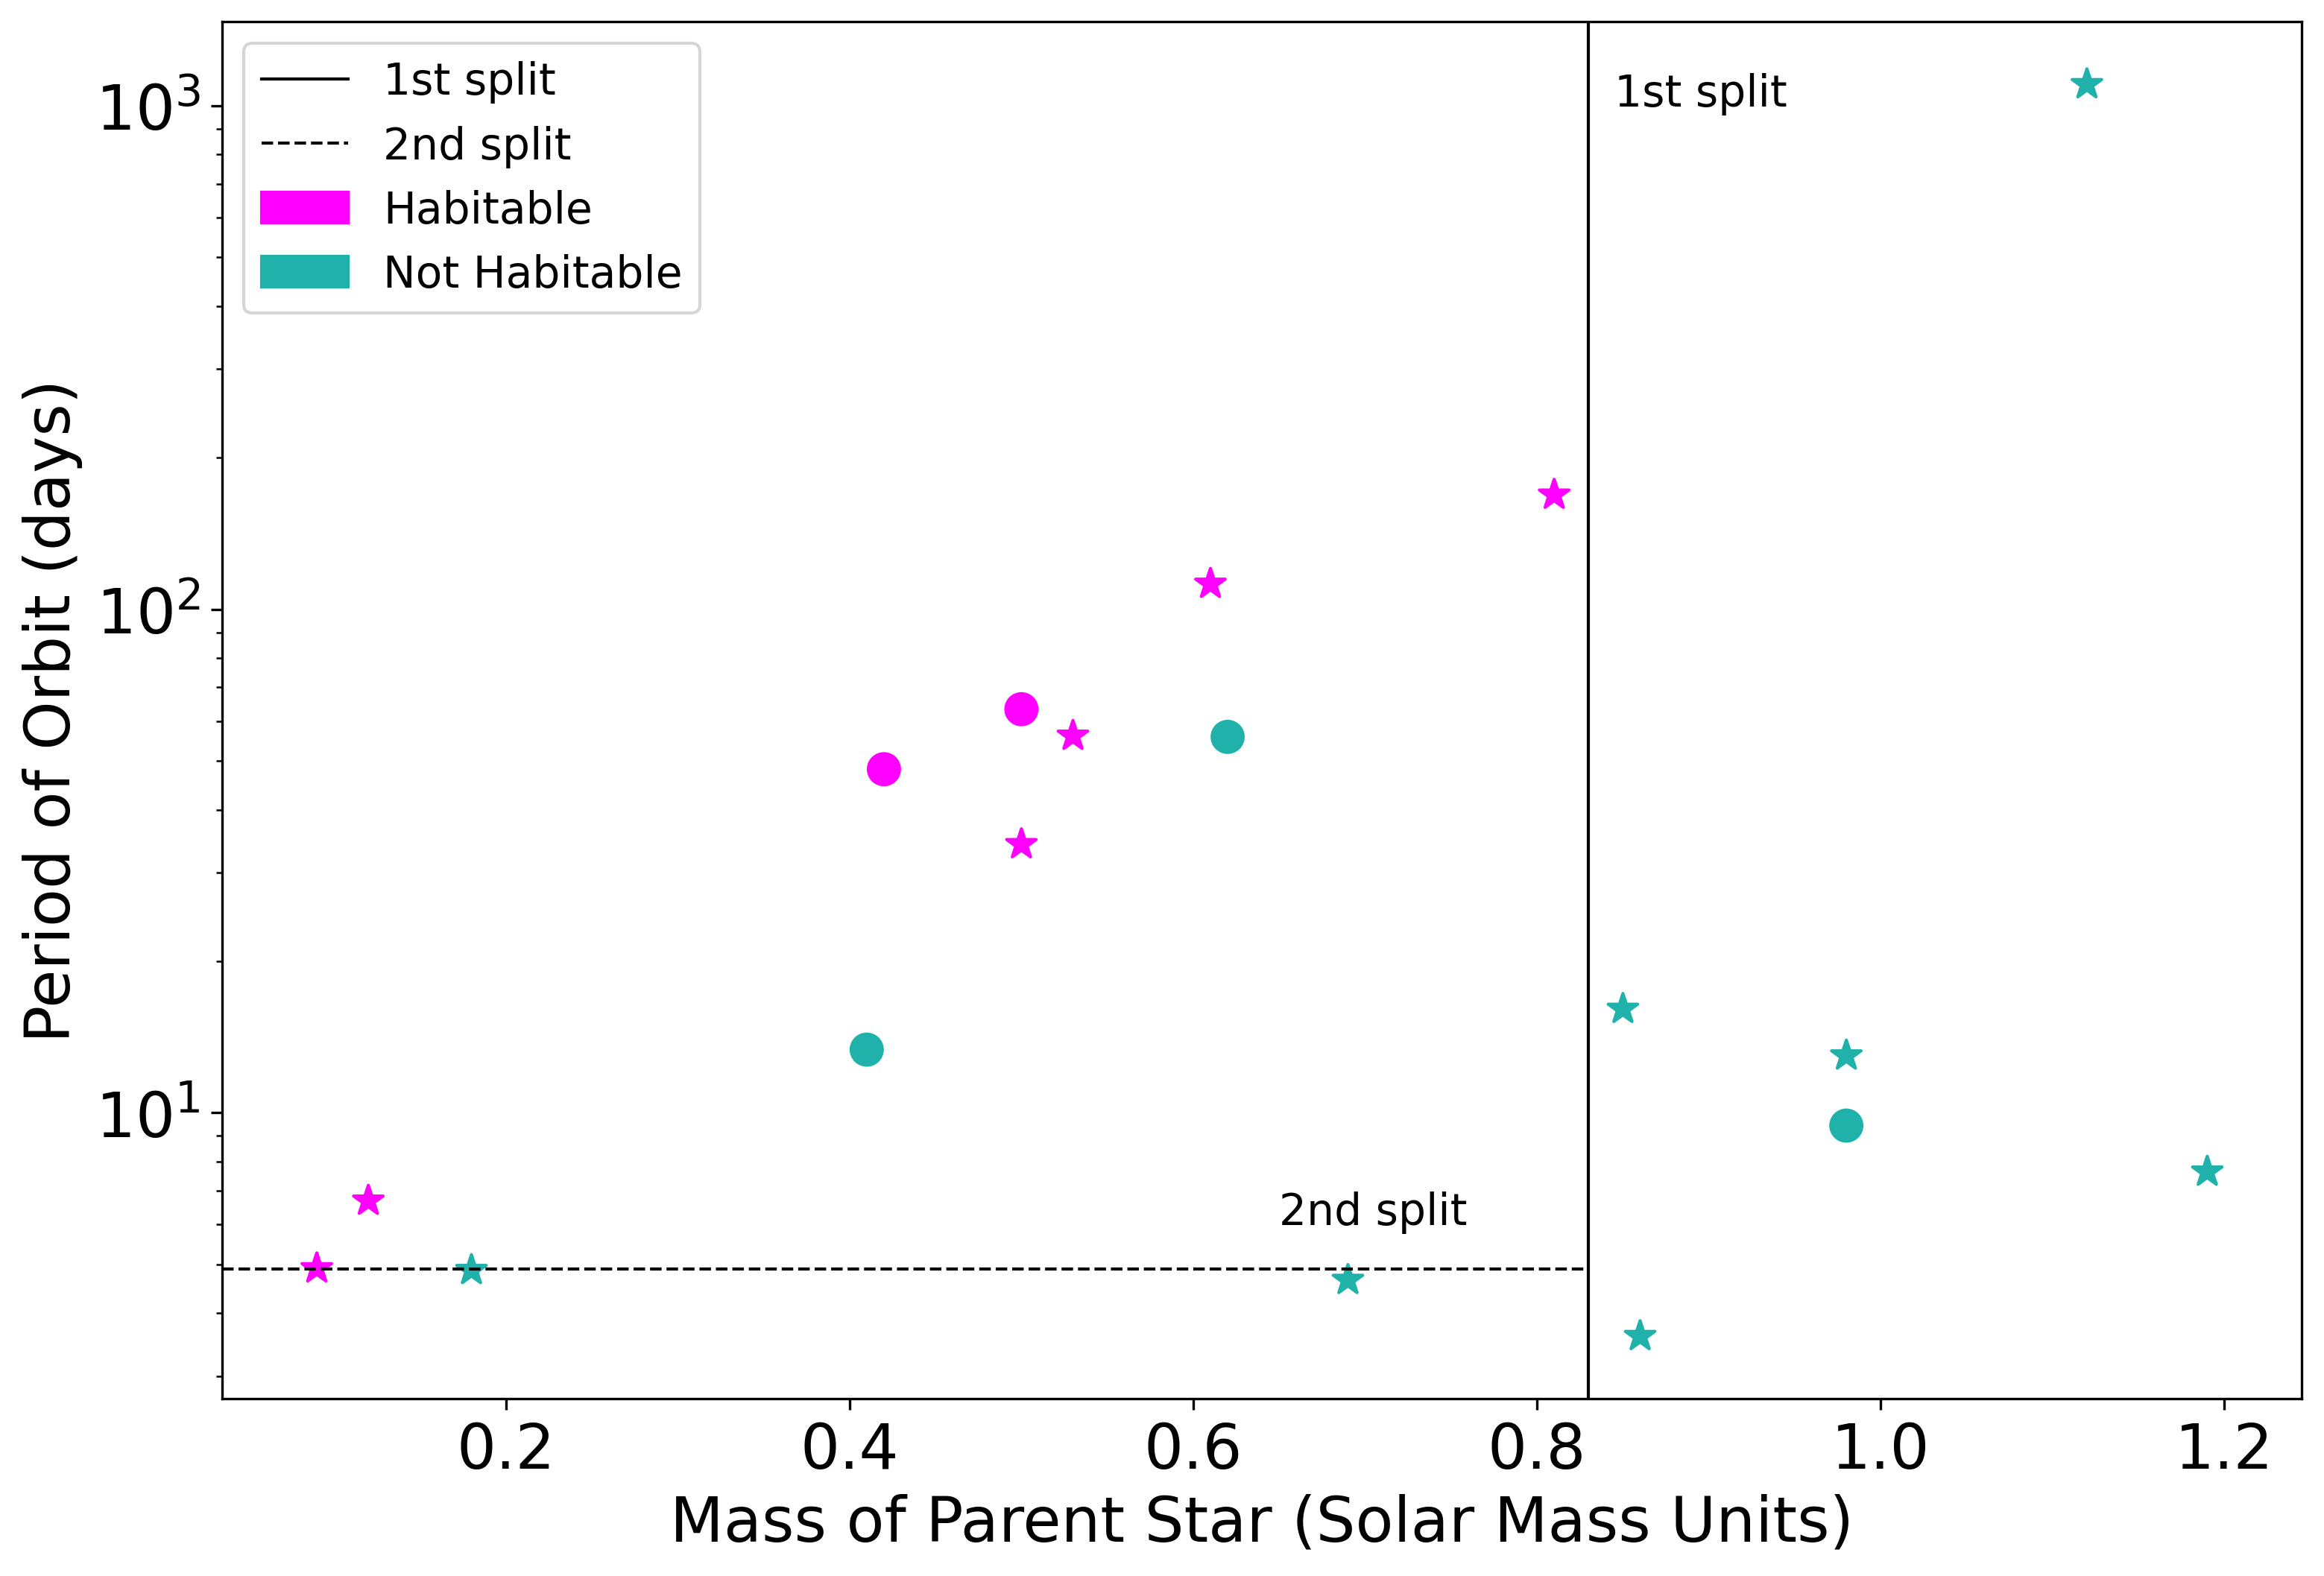

In [11]:
plt.figure(figsize=(12,8))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])

#Will now plot the train set and test set points

plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',\
            c = TrainSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Train')

plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',\
            c = TestSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Test')

plt.yscale('log')

plt.xlabel('Mass of Parent Star (Solar Mass Units)')

plt.ylabel('Period of Orbit (days)');

#I can add the splits to the plot

plt.axvline(x=0.83, linewidth =1, ls = '-', label = '1st split', c='k')

plt.axhline(y=4.891, xmin = 0, xmax = 0.655, linewidth =1, ls = '--', label = '2nd split',c='k')

plt.text(0.845, 10**3, '1st split', fontsize=14)
         
plt.text(0.65, 6, '2nd split', fontsize=14)

#Add legend, including unlabeled objects

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')

magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[2].set_color('k')
leg.legendHandles[3].set_color('k')


plt.legend(handles=[leg.legendHandles[2],leg.legendHandles[3], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14);


### Questions: 
    
- What is the accuracy (percentage of correct classifications) on the training set? 100%


- How about on the test set (you have to run the test example through the tree, or look at the figure above)? 60%

In [12]:
#We want, of course, to be able to answer the questions in code as well.

ypred = model.predict(Xtest)

In [13]:
metrics.accuracy_score(ytest, ypred) #test score

0.6

In [14]:
metrics.accuracy_score(ytrain, model.predict(Xtrain)) #train score


1.0

### Our final reflection will be an exercise in picking a different train/test split.-- try a different value of where in the set to break things up into a training and testing set. Visualize the new tree. 

### Questions: 
    
- What is the accuracy (percentage of correct classifications) on the training set? 100%


- How about on the test set? 


### We can now visualize the new tree:

### This is a simple notebook to build and visualize the kNN algorithm.


In [15]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd 

import sklearn

from sklearn.model_selection import train_test_split # we don't use it here, but it's a useful function!

from sklearn.tree import DecisionTreeClassifier # how methods are imported 

from sklearn import metrics # this will give us access to evaluation metrics

from sklearn import neighbors # here comes the method of the day

In [16]:
LearningSet = pd.read_csv('HPLearningSet.csv')

LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

In [17]:
#By now we know data frames

LearningSet.head() #Visualizes the first 5 rows

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0


In [18]:
TrainSet =  LearningSet.iloc[:13,:] #.iloc is used to slice data frames using positional indexes

TestSet = LearningSet.iloc[13:,:]

In [19]:
### We split the train and test sets in features and label

In [20]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)

In [21]:
ytrain = TrainSet.P_HABITABLE

ytest = TestSet.P_HABITABLE

It's a simple algorithm based on the idea of distance: we look for the k (an integer) objects that are closest to the one we would like to classify, and take the majority vote among the k classes of the k neighbors.

If you are wondering: what is even there to fit?

I had the same question, and found some solace in [this post](https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier).

In [22]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [23]:
model

KNeighborsClassifier(n_neighbors=3)

### For visualization purposes, let's use only the first two features to build the model.


Xtrain.iloc[:,:2] 

#### Build model by fitting training set; predict labels for test set

In [24]:
# We can chain the fit/predict process like this, or use the fit_predict method

model.fit(Xtrain.iloc[:,:2],ytrain).predict(Xtest.iloc[:,:2]) 

array([1, 0, 1, 0, 1])

#### Calculate accuracy on the train set and on the test set (train score and test score)

In [25]:
print(metrics.accuracy_score(ytrain, model.predict(Xtrain.iloc[:,:2])))

print(metrics.accuracy_score(ytest, model.predict(Xtest.iloc[:,:2]))) 

0.6923076923076923
0.8


#### After fitting and predicting, we can access the k neighbors for each element in the test set like this:

In [26]:
model.kneighbors(Xtest.iloc[:,:2]) #the first element gives the distances, the second the index

(array([[ 0.26575741, 21.66422235, 39.72600482],
        [ 0.67412717,  2.76390862,  5.76653597],
        [ 7.28027781, 29.19416   , 47.25690512],
        [ 1.807928  ,  2.87670841,  3.5579225 ],
        [ 7.9223177 , 13.99261869, 32.05672308]]),
 array([[11, 10,  1],
        [ 4,  1,  2],
        [11, 10,  1],
        [ 2,  7,  4],
        [11, 10,  1]]))

### Let's now visualize our results, similarly to what we did for the DT.

We can use the largest distances as the radius of the circles - every point inside the circle is a neighbor!


In [27]:
for i in range(len(TestSet)): # cycle through elements of the test set
    
    print(model.kneighbors(Xtest.iloc[:,:2])[0][i,2]) # this prints out the third element of the distances vector

39.7260048163029
5.766535965914376
47.2569051246575
3.5579225
32.056723080157795


/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/2128720296.py:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('k')
/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/2128720296.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_facecolor('none')
/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/2128720296.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('k')
/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/2128720296.py:31: MatplotlibDeprecationWarning: The legendHandles attr

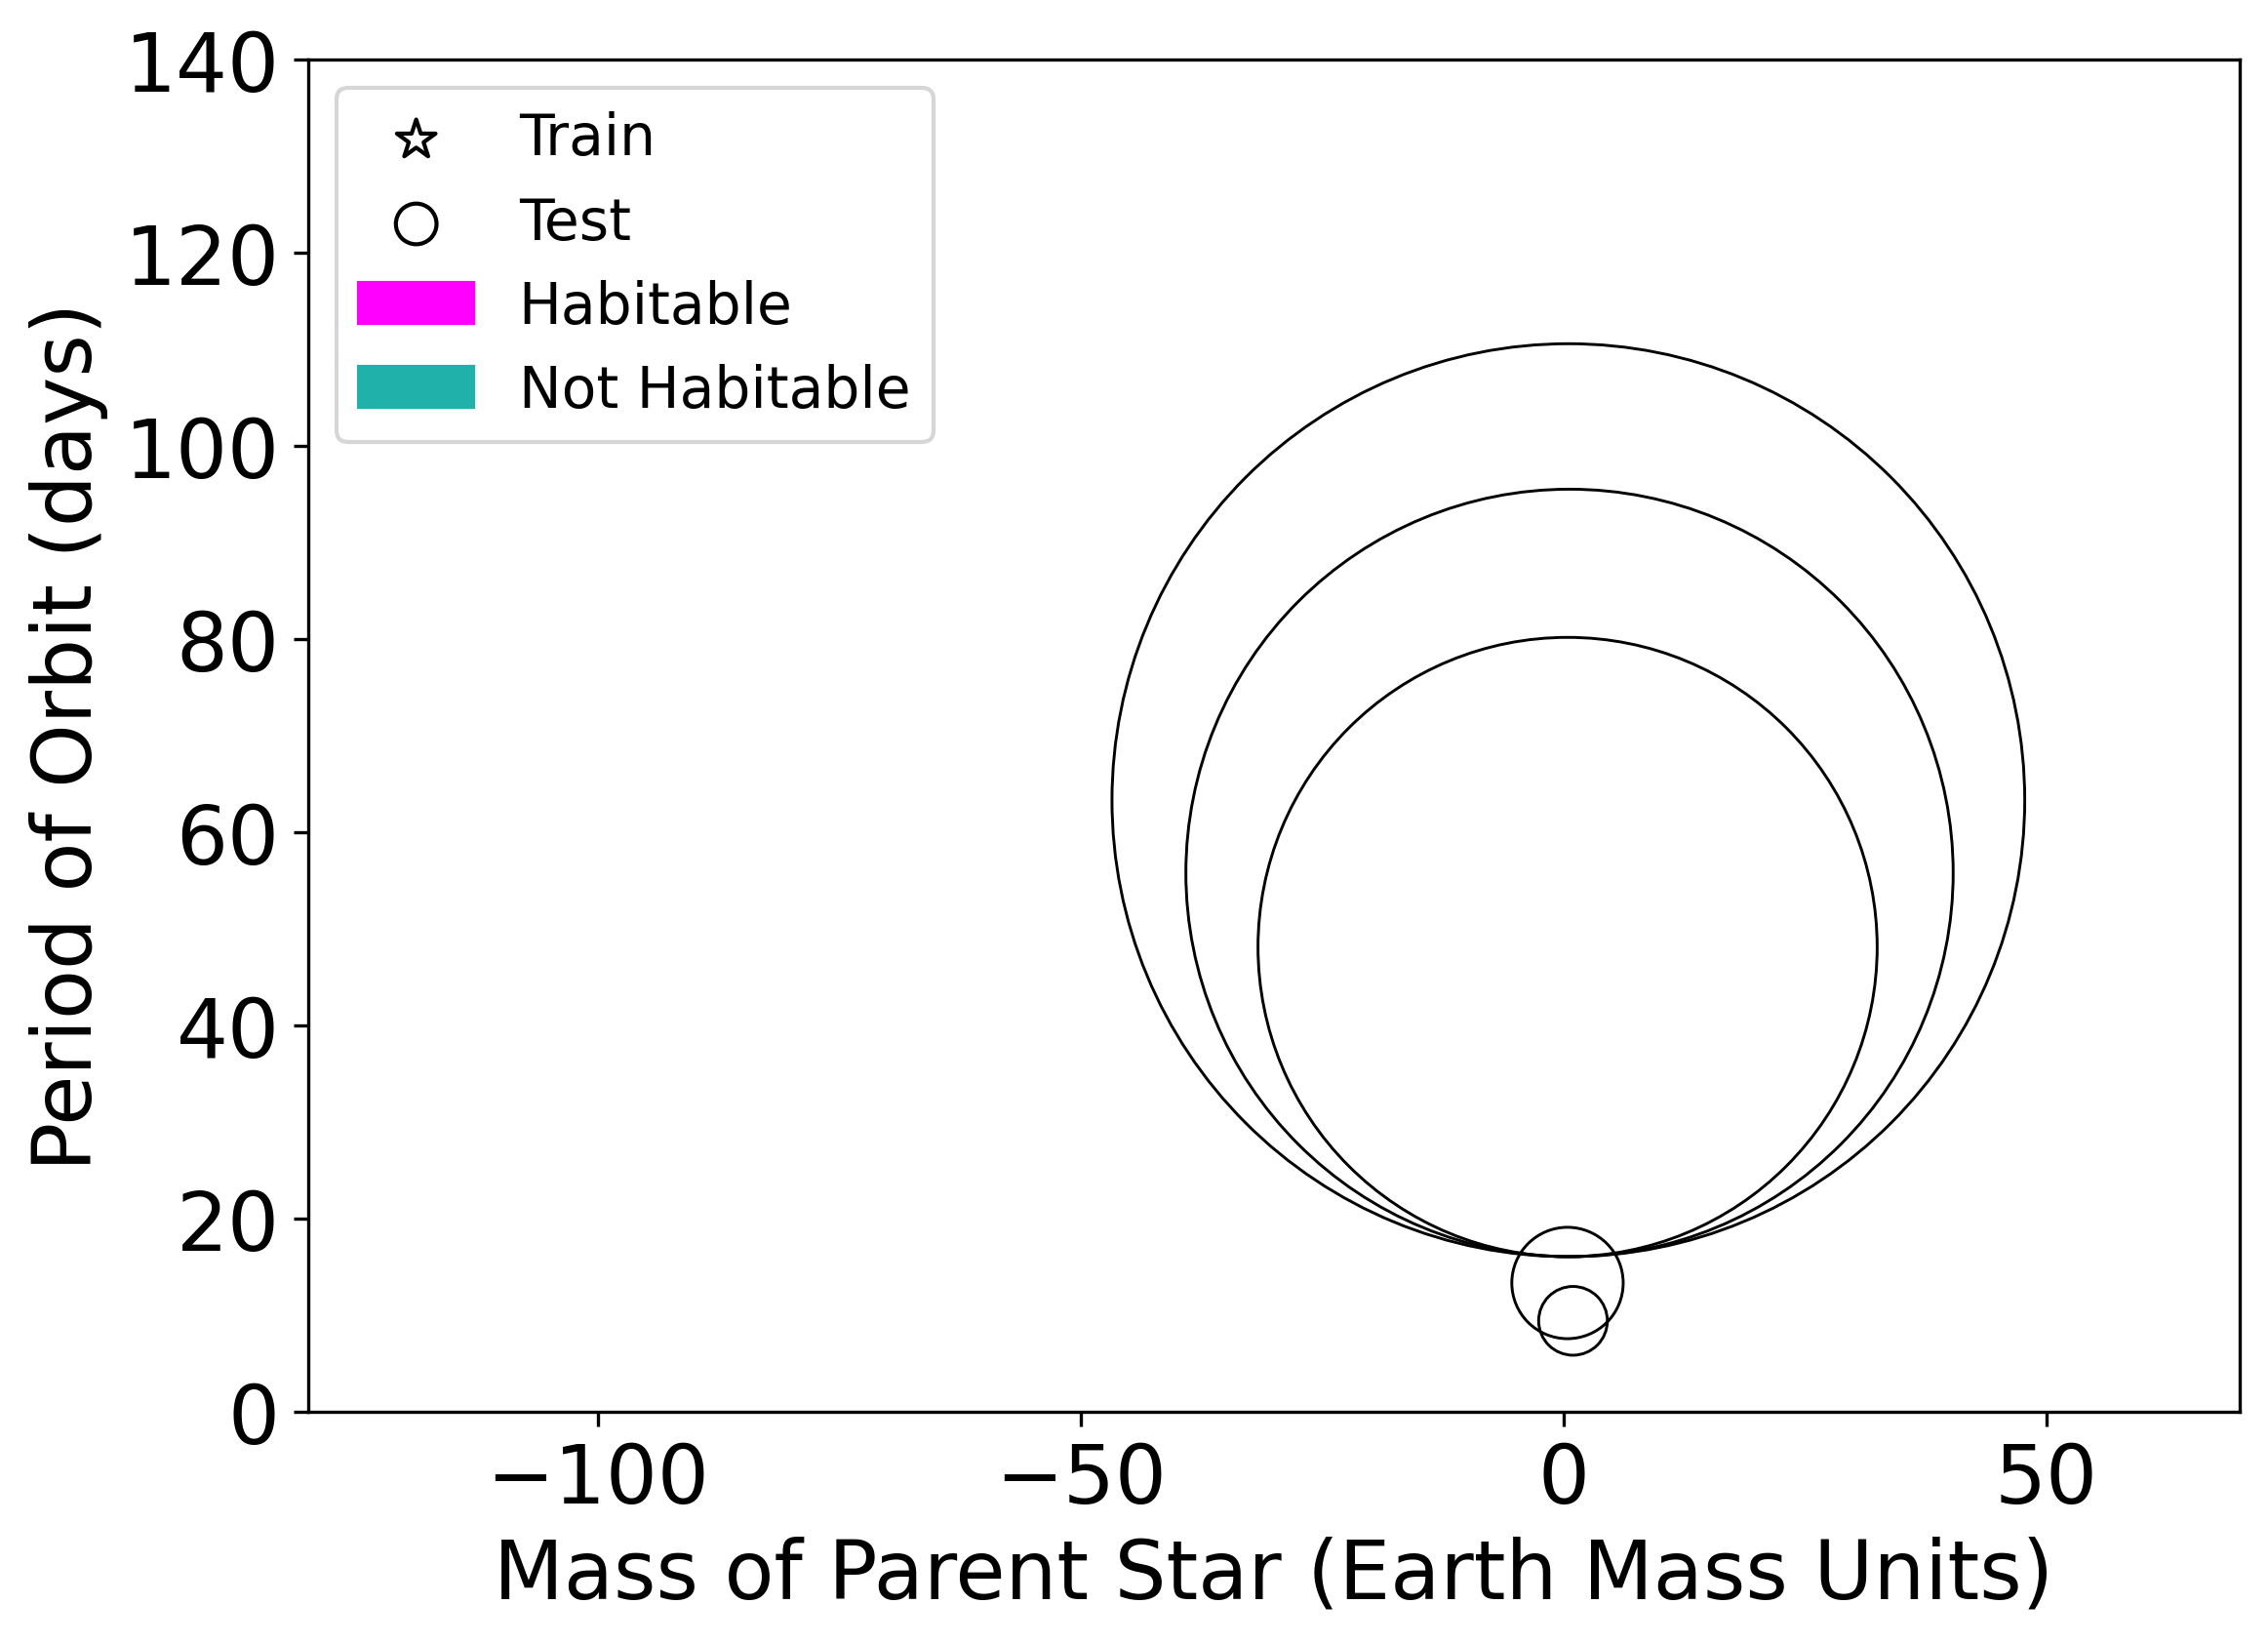

In [28]:
plt.figure(figsize=(10,6))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
a = plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',facecolor = 'none',\
            c = TrainSet['P_HABITABLE'], s = 100, label = 'Train', cmap=cmap) 

a.set_facecolor('none')

a = plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',facecolors = 'none',\
            c = TestSet['P_HABITABLE'], s = 100, label = 'Test', cmap=cmap) 

a.set_facecolor('none')

for i in range(len(TestSet)): #plot neighbors

    circle1=plt.Circle((TestSet['S_MASS'].iloc[i],TestSet['P_PERIOD'].iloc[i]),model.kneighbors(Xtest.iloc[:,:2])[0][i,2],\
                       lw = 0.7, edgecolor='k',facecolor='none')
    plt.gca().add_artist(circle1)
    
plt.gca().set_aspect(1)

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14)

plt.xlim(-130,70)
plt.ylim(0,140)
plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)');

#plt.savefig('HabPlanetsKNN2features.png', dpi = 300)

### Do you notice any issue here?
This can be solved by <b>scaling</b>. Scaling is a very important pre-processing step for most ML algorithms.

See some examples of different scaling algorithms [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

We will go with RobustScaler, which is more resistant to outliers than the standard version.


In [29]:
scaler = sklearn.preprocessing.RobustScaler()

In [30]:
scaler.fit(Xtrain) # important: we only scale the train set.

RobustScaler()

In [31]:
scaledXTrain = scaler.transform(Xtrain)

In [32]:
scaledXTrain

array([[ 0.47222222, -0.18360363, -0.33840183],
       [ 0.44444444,  0.06038761,  0.05671512],
       [ 1.38888889, -0.10467304, -0.14339694],
       [-0.22222222,  1.94175736,  1.60417741],
       [ 0.80555556,  0.        ,  0.        ],
       [-1.66666667, -0.15801948, -0.43679409],
       [ 0.        , -0.16299717, -0.31519247],
       [-1.58333333, -0.12323674, -0.38472405],
       [ 1.19444444, 21.311672  , 11.01745224],
       [ 0.33333333,  3.04655169,  2.38937206],
       [-0.52777778,  0.41352236,  0.3761471 ],
       [-0.44444444,  0.84198052,  0.66159817],
       [-1.41666667, -0.15877753, -0.40201197]])

In [33]:
scaledXtest = scaler.transform(Xtest) # note that these are now numpy arrays, not data frames

In [34]:
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])

array([1, 0, 1, 0, 1])

In [35]:
model.kneighbors(scaledXtest[:,:2]) #The distances of neighbors for test set objects look more balanced

(array([[0.2500478 , 0.53900086, 1.00570768],
        [0.47721081, 0.66005572, 0.79614695],
        [0.16494121, 0.57079985, 1.00501058],
        [0.06956397, 0.35230123, 0.38378203],
        [0.34256727, 0.35245873, 1.07701084]]),
 array([[11, 10,  1],
        [10, 12,  6],
        [11, 10,  3],
        [ 4,  0,  1],
        [11, 10, 12]]))

/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/1377490305.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('k')
/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/1377490305.py:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('k')
/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_52785/1377490305.py:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\


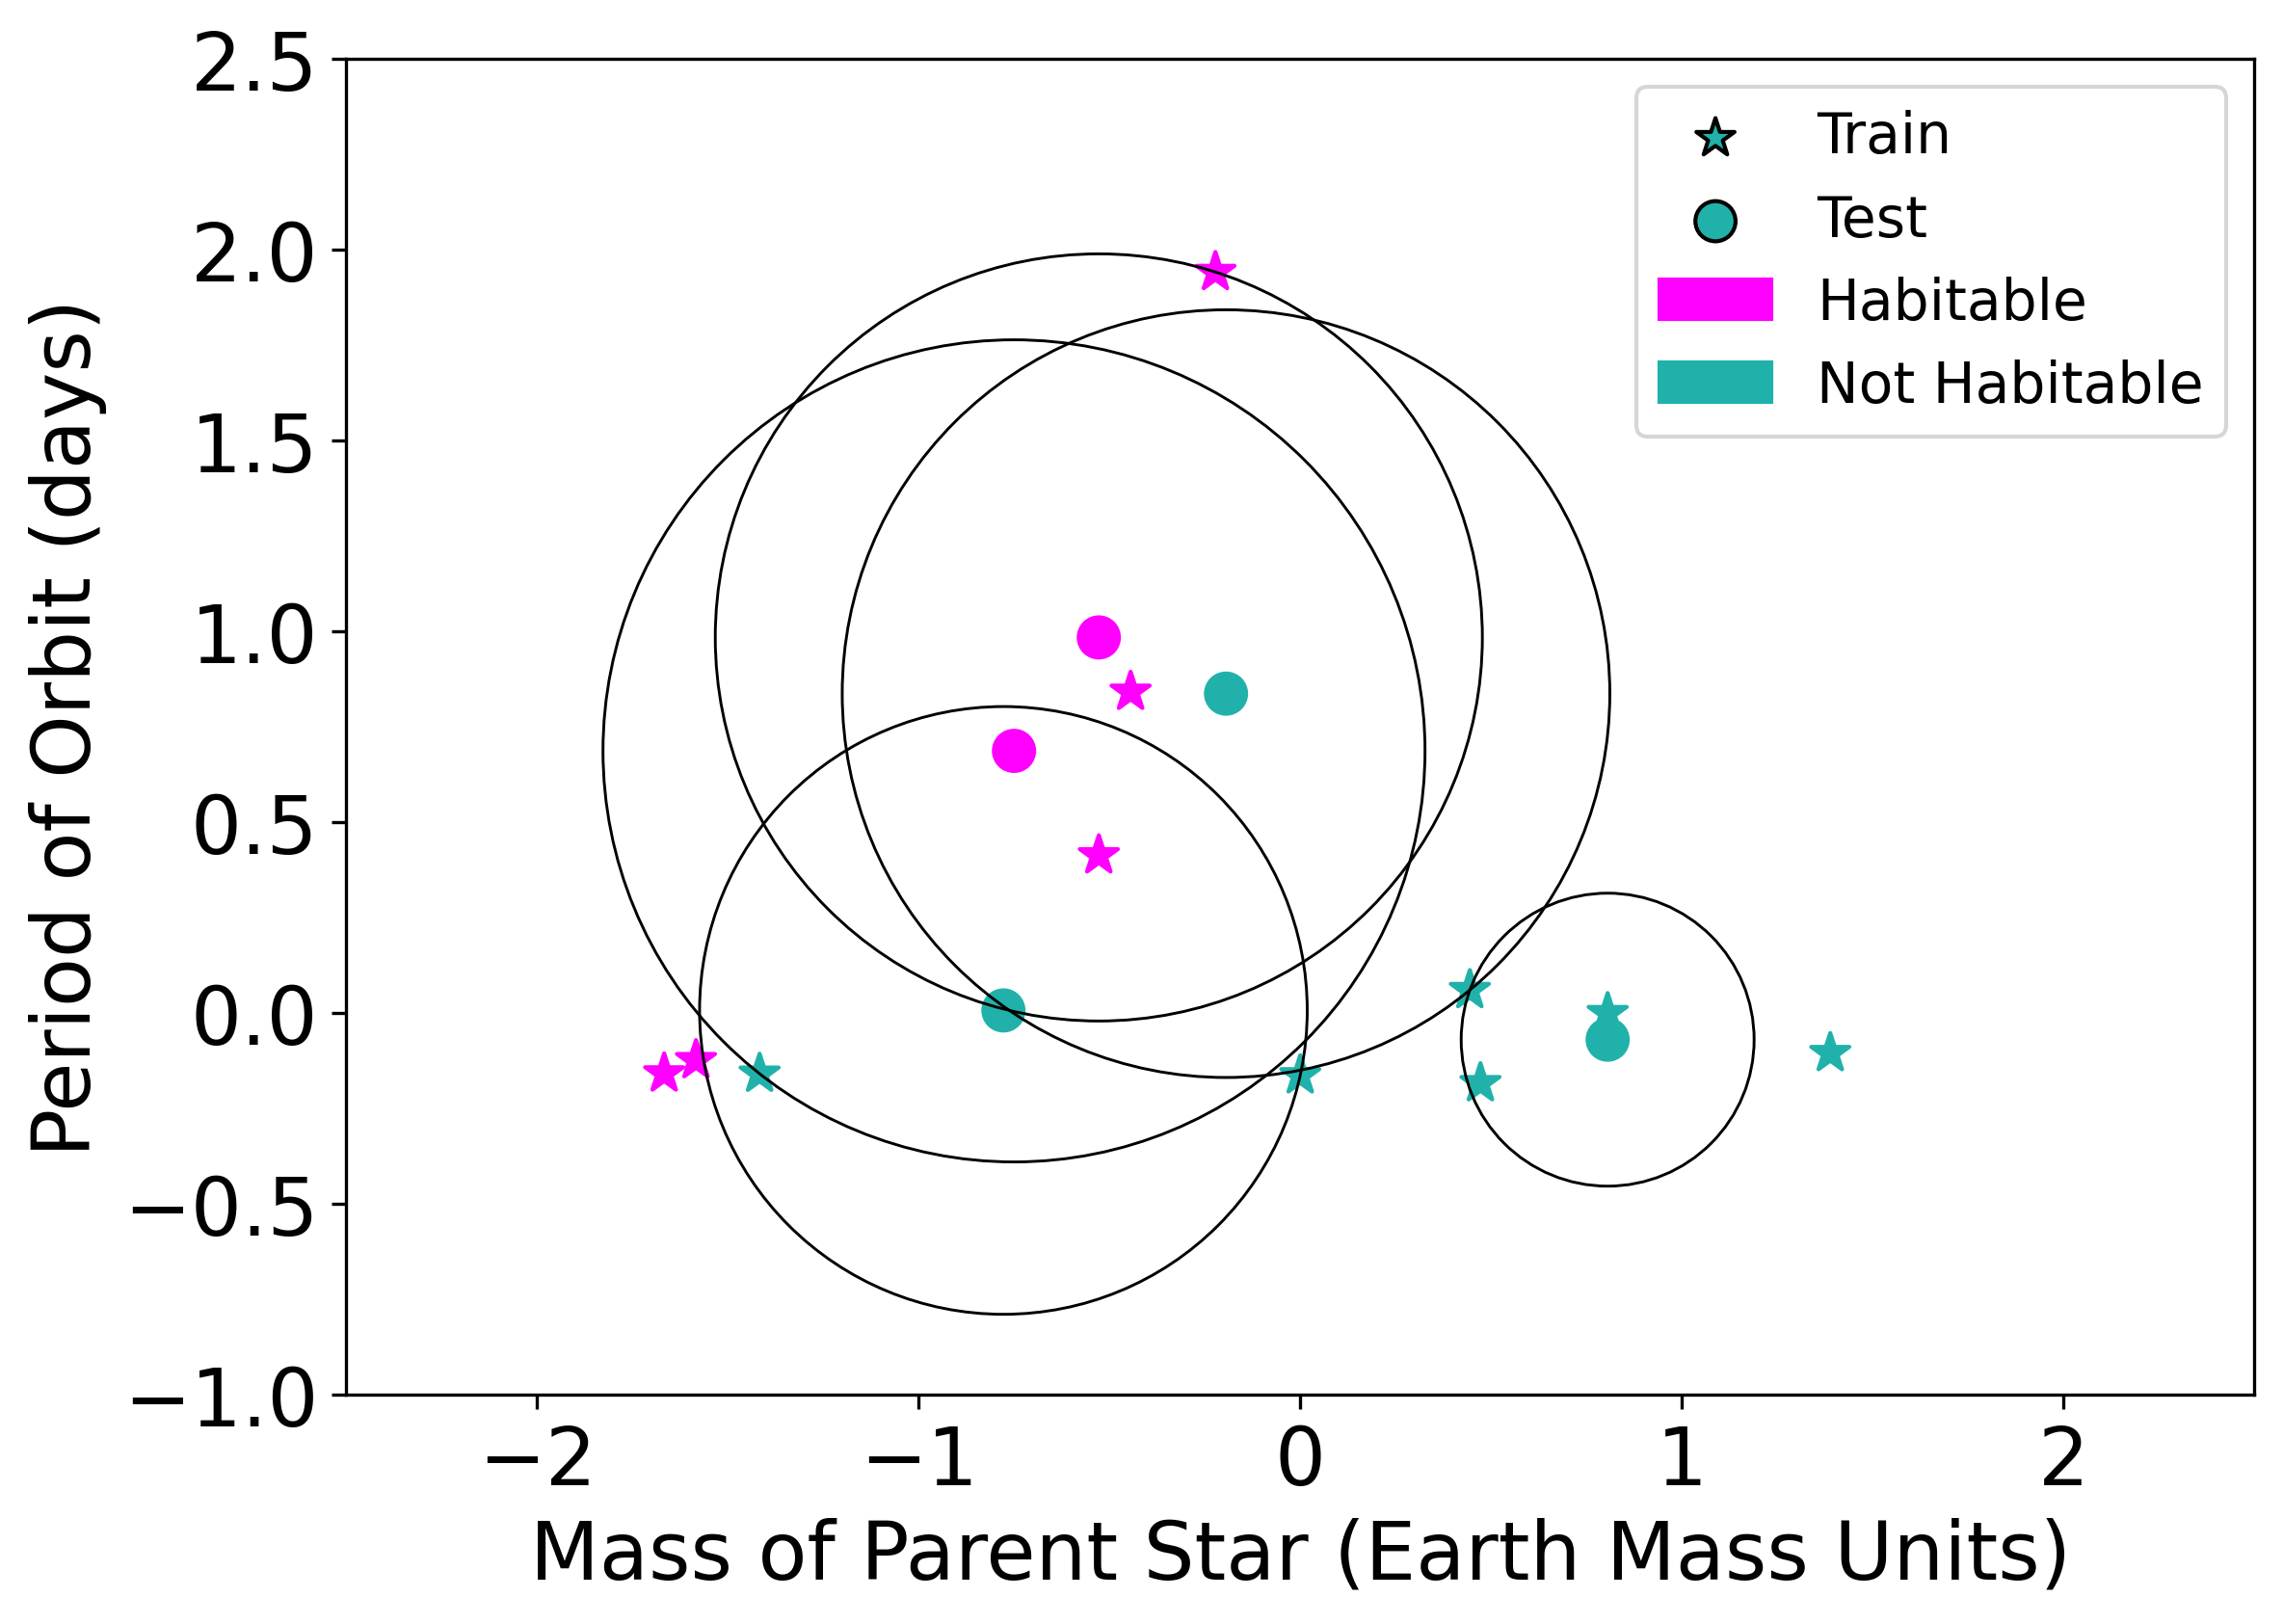

In [36]:
plt.figure(figsize=(10,6))#, aspect_ratio = 'equal')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 

plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap) #label = ,

for i in range(len(TestSet)):

    circle1=plt.Circle((scaledXtest[i,0],scaledXtest[i,1]),model.kneighbors(scaledXtest[:,:2])[0][i,2],\
                       edgecolor='k',facecolor='none', lw = 0.7)
    plt.gca().add_artist(circle1)

plt.gca().set_aspect(1)

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
#leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
#leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper right', fontsize = 14)

plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)');


plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5);

#plt.savefig('HabPlanetsKNNscaled.png', dpi = 300)

In [37]:
### Note: for the purpose of application (not visualization), we should use all three features.

### Final remarks:
    
kNN needs scaling! Does DT have the same issue?

Any thoughts on strengths/weaknesses?